In [ ]:
# if (!requireNamespace("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("SC3")

In [7]:
library(SingleCellExperiment)
library(ggplot2)
library(corrplot)
library(RColorBrewer)
library(SC3)

In [8]:
### genetic effects due to GxC
## single cell profiles
df = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/MOFA10/eqtl_tot_genetic_effect_all.txt", sep="\t",row.names = 1)
nrow(df)
ncol(df)
head(df,2)

[1] 8352

[1] 213

,ABHD10_.3_111697439_T_G,ABHD12B_.14_51328222_C_T,ACKR2_.3_42817129_C_T,ADD2_.2_70894426_A_T,ADSL_.22_40757228_A_C,AIM1L_.1_26673825_C_T,AKAP7_.6_131691964_C_A,ALDH7A1_.5_126011412_G_A,ANKRD18B_.9_33524775_C_A,APIP_.11_34905987_T_C,...,YWHAE_.17_1246420_G_A,ZBBX_.3_167080934_T_G,ZC3HAV1_.7_138730361_T_C,ZFR2_.19_3840157_C_T,ZG16B_.16_2871121_T_C,ZNF423_.16_49599995_C_G,ZNF552_.19_58315273_G_A,ZNF738_.19_21474173_G_A,ZNF77_.19_2936535_G_A,ZP3_.7_76177284_C_T
HPSI0714i-iudw_1--DA--d30--0,-0.2108622,0.003924475,0.02206444,0.02834211,0.2235163,-0.03575032,-0.09473256,0.006901295,0.0006737957,-0.07499119,...,0.06962421,0.1120253,-0.04172133,0.01126897,0.1057579,-0.03101814,0.0909417,0.3020245,-0.1583842,-0.05596878
HPSI0714i-iudw_1--DA--d30--1,-0.2283969,-0.047217741,0.10596178,0.02514689,-0.1921801,-0.01471768,0.01878961,-0.171038975,-0.1105473675,-0.18686595,...,-0.21070417,0.3759854,0.08774666,0.02505916,-0.1950055,-0.22780547,0.0775938,0.3452492,-0.3472152,-0.15259400


In [9]:
# build the sce object
sce0 <- SingleCellExperiment(
assays = list(counts = t(df), logcounts = t(df)))
sce0

class: SingleCellExperiment 
dim: 213 8352 
metadata(0):
assays(2): counts logcounts
rownames(213): ABHD10_.3_111697439_T_G ABHD12B_.14_51328222_C_T ...
  ZNF77_.19_2936535_G_A ZP3_.7_76177284_C_T
rowData names(0):
colnames(8352): HPSI0714i-iudw_1--DA--d30--0
  HPSI0714i-iudw_1--DA--d30--1 ... HPSI0114i-rozh_4--DA--d52_tr--11
  HPSI0114i-rozh_4--DA--d52_tr--12
colData names(0):
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [10]:
pseudocells = colnames(sce0)
genes = gsub("\\.","-",gsub("_.*","",rownames(sce0)))
head(pseudocells)
head(genes,20)

[1] "HPSI0714i-iudw_1--DA--d30--0" "HPSI0714i-iudw_1--DA--d30--1"
[3] "HPSI0714i-iudw_1--DA--d30--2" "HPSI0714i-iudw_1--DA--d30--3"
[5] "HPSI0714i-iudw_1--DA--d30--4" "HPSI0714i-iudw_1--DA--d30--5"

[1] "ABHD10"    "ABHD12B"   "ACKR2"     "ADD2"      "ADSL"      "AIM1L"    
 [7] "AKAP7"     "ALDH7A1"   "ANKRD18B"  "APIP"      "ATE1-AS1"  "ATG10"    
[13] "B4GALT5"   "BATF3"     "BTBD9"     "C11orf24"  "C15orf57"  "C17orf50" 
[19] "C19orf10"  "C20orf201"

In [11]:
### expression object
sce = readRDS("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/DA_phenotype_wo_outliers2_sce.rds")
sce

class: SingleCellExperiment 
dim: 32738 9219 
metadata(0):
assays(2): counts logcounts
rownames(32738): MIR1302.10 FAM138A ... AC002321.2 AC002321.1
rowData names(0):
colnames(9219): HPSI0714i-iudw_1--DA--d30--0
  HPSI0714i-iudw_1--DA--d30--1 ... HPSI0114i-rozh_4--DA--d52_tr--11
  HPSI0114i-rozh_4--DA--d52_tr--12
colData names(5): pseudocell celltype donor cluster condition
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [12]:
rownames(sce) = gsub("\\.","-",rownames(sce))

In [13]:
sce1 = sce[genes,pseudocells]
sce1

class: SingleCellExperiment 
dim: 213 8352 
metadata(0):
assays(2): counts logcounts
rownames(213): ABHD10 ABHD12B ... ZNF77 ZP3
rowData names(0):
colnames(8352): HPSI0714i-iudw_1--DA--d30--0
  HPSI0714i-iudw_1--DA--d30--1 ... HPSI0114i-rozh_4--DA--d52_tr--11
  HPSI0114i-rozh_4--DA--d52_tr--12
colData names(5): pseudocell celltype donor cluster condition
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [ ]:
####### cluster 

In [172]:
g0 <- buildSNNGraph(sce0, k=20)
clust0 <- igraph::cluster_walktrap(g0)$membership
table(clust0)

clust0
   1    2    3    4    5    6    7    8    9   10 
1394  255 1182 1848  358 1269 1535  202  153  156 

In [173]:
g1 <- buildSNNGraph(sce1, k=20)
clust1 <- igraph::cluster_walktrap(g1)$membership
table(clust1)

clust1
   1    2    3    4    5    6    7    8    9 
1786  471  846 1021 1474  151  914 1216  473 

In [20]:
### get tSNE coordinates

In [14]:
file2 = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/mofa_logcounts_model_factors.csv"

In [15]:
df = read.csv(file2, row.names = 1)
head(df,2)

,MOFA1,MOFA2,MOFA3,MOFA4,MOFA5,MOFA6,MOFA7,MOFA8,MOFA9,MOFA10,MOFA11,MOFA12,MOFA13,MOFA14,MOFA15,MOFA16,MOFA17,MOFA18,MOFA19,MOFA20
HPSI0714i-iudw_1--DA--d30--0,1.666456,0.5892917,-1.2180321,0.5332707,-0.1147184,-0.7004497,-0.8720116,-0.7222332,0.1454206,0.2551732,-0.1537032,0.04656182,0.9335609,-0.3033329,-1.420607,0.3760455,-1.3750346,-1.321022,0.03628515,-0.5237842
HPSI0714i-iudw_1--DA--d30--1,1.793275,-1.0897083,0.5161943,0.3031652,-0.3707059,-0.6362975,1.1359303,0.2466621,-0.3232387,-0.3289503,0.2974980,0.10648809,1.4348016,0.1735013,1.149061,-0.5206075,0.8877376,-0.130147,0.94184241,0.6611521


In [16]:
### tSNE
set.seed(0)
library(Rtsne)
tsne = Rtsne(df)

df_tsne = data.frame(tsne$Y)
colnames(df_tsne) = c("tSNE1","tSNE2")
df_tsne$condition = sce$condition

In [17]:
rownames(df_tsne) = rownames(df)
df_tsne = df_tsne[pseudocells,]

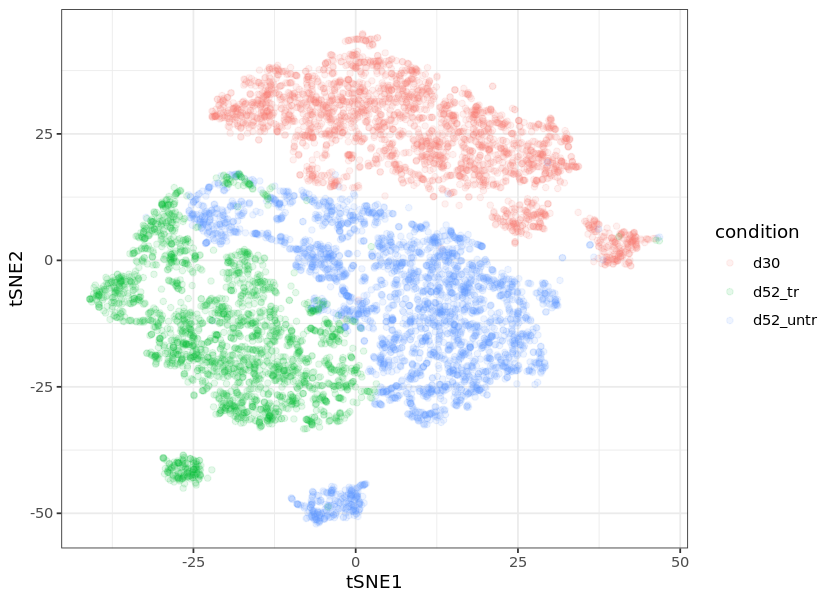

In [18]:
options(repr.plot.width = 7, repr.plot.height = 5)
p = ggplot(df_tsne, aes(x = tSNE1, y = tSNE2, col = condition)) + geom_point(alpha = 0.1) + theme_bw()
p

In [174]:
df_tsne$cluster0 = clust0
df_tsne$cluster1 = clust1

In [19]:
library(SC3)

In [20]:
counts(sce0)[1:5,1:5]

,HPSI0714i-iudw_1--DA--d30--0,HPSI0714i-iudw_1--DA--d30--1,HPSI0714i-iudw_1--DA--d30--2,HPSI0714i-iudw_1--DA--d30--3,HPSI0714i-iudw_1--DA--d30--4
ABHD10_.3_111697439_T_G,-0.210862228,-0.22839694,-0.37026693,-0.46900407,0.35035641
ABHD12B_.14_51328222_C_T,0.003924475,-0.04721774,-0.18798659,0.01603841,-0.23661300
ACKR2_.3_42817129_C_T,0.022064436,0.10596178,0.11071216,0.08790047,0.01487196
ADD2_.2_70894426_A_T,0.028342113,0.02514689,-0.08986937,0.05432180,-0.12134894
ADSL_.22_40757228_A_C,0.223516280,-0.19218007,0.09405019,-0.04301341,0.07402790


In [21]:
rowData(sce0)$feature_symbol = rownames(sce0)
sce0 <- sc3(sce0, ks = 3:8, biology = TRUE, gene_filter = FALSE)

Setting SC3 parameters...
Your dataset contains more than 2000 cells. Adjusting the nstart parameter of kmeans to 50 for faster performance...
Defining training cells for SVM using 5000 random cells...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...
Calculating biology...


In [24]:
saveRDS(sce0, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/sce_obj_genetic_effects_w_SC3_clusters.rds")

In [30]:
rowData(sce1)$feature_symbol = rownames(sce1)
sce1 <- sc3(sce1, ks = 3:8, biology = TRUE, gene_filter = FALSE)

Setting SC3 parameters...
Your dataset contains more than 2000 cells. Adjusting the nstart parameter of kmeans to 50 for faster performance...
Defining training cells for SVM using 5000 random cells...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...
Calculating biology...


In [31]:
saveRDS(sce1, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/sce_obj_gene_expression_subset_w_SC3_clusters.rds")

In [34]:
df_tsne$cluster0 = colData(sce0)$sc3_8_clusters
df_tsne$cluster1 = colData(sce1)$sc3_8_clusters

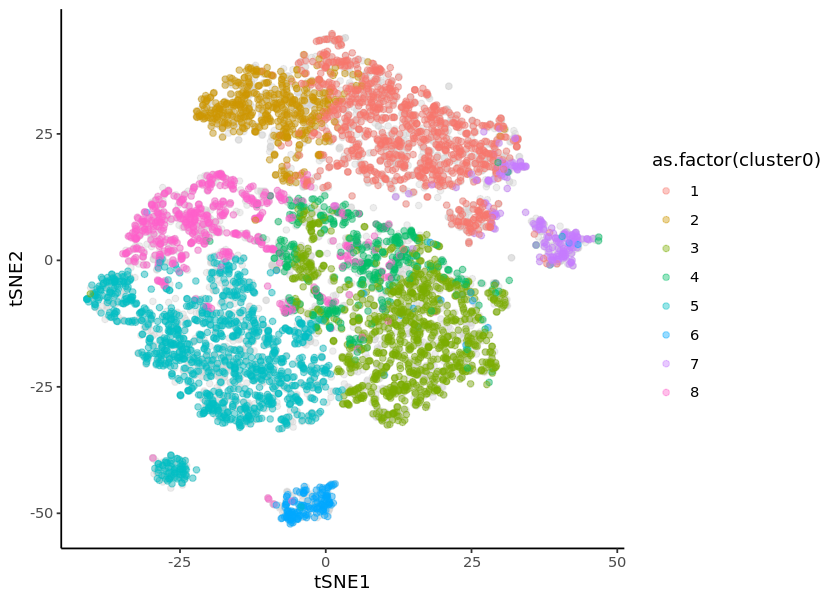

In [38]:
options(repr.plot.width = 7, repr.plot.height = 5)
p = ggplot(df_tsne, aes(x = tSNE1, y = tSNE2)) + geom_point(col="lightgrey",alpha = 0.4) + theme_bw()
p + theme_classic() + geom_point(aes(x = tSNE1, y = tSNE2, col = as.factor(cluster0)), 
                                 data = df_tsne[df_tsne$cluster0 %in% c(1:9),], alpha =0.4)

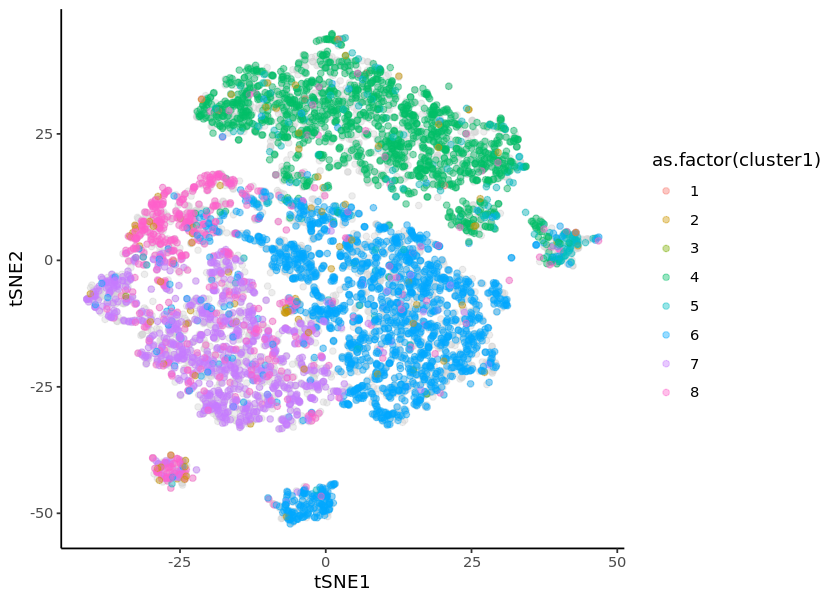

In [37]:
options(repr.plot.width = 7, repr.plot.height = 5)
p = ggplot(df_tsne, aes(x = tSNE1, y = tSNE2)) + geom_point(col="lightgrey",alpha = 0.4) + theme_bw()
p + theme_classic() + geom_point(aes(x = tSNE1, y = tSNE2, col = as.factor(cluster1)), 
                                 data = df_tsne[df_tsne$cluster1 %in% c(1:9),], alpha =0.4)

In [39]:
df_clusters = df_tsne[,c("cluster0","cluster1")]
df_clusters = df_clusters[df_clusters$cluster0 %in% c(1:8) & df_clusters$cluster1 %in% c(1:8),]
head(df_clusters)

,cluster0,cluster1
HPSI0714i-iudw_1--DA--d30--4,1,4
HPSI0714i-iudw_1--DA--d30--5,1,4
HPSI0714i-iudw_1--DA--d30--6,1,4
HPSI0714i-iudw_1--DA--d30--7,1,4
HPSI0714i-iudw_1--DA--d30--8,1,4
HPSI0714i-iudw_1--DA--d30--9,1,4


In [40]:
# table(df_clusters$cluster0, df_clusters$cluster1)

In [41]:
mat = as.matrix(table(df_clusters$cluster0, df_clusters$cluster1))
mat

   
      1   2   3   4   5   6   7   8
  1   1   9   0 525  27   9   0   7
  2   1   4   0 264   5   1   0   4
  3   0   7   0   1   2 578   8   9
  4   0   3   0   3   4 239   3  11
  5   0  14   1   0   2  33 535 103
  6   0   1   0   1   2 103   1   1
  7   0   1   0  50  53   9   0   6
  8   0  14   1   8   9  91  13 196


Attaching package: ‘reshape’

The following objects are masked from ‘package:S4Vectors’:

    expand, rename



X1,X2,value
1,1,1
2,1,1


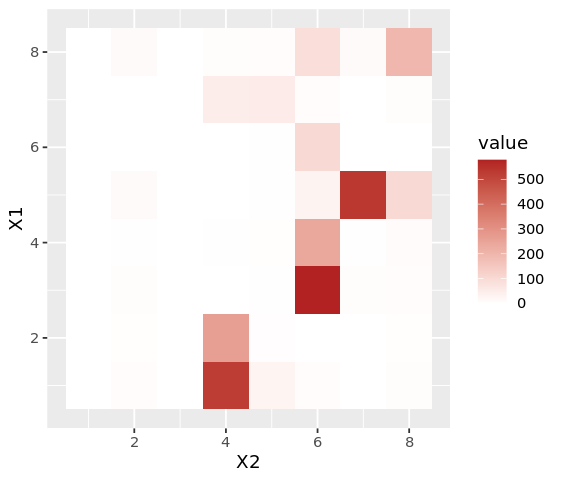

In [42]:
library(reshape)
library(ggplot2)
melted_mat = melt(mat)
colnames(melted_mat) = c("X1","X2","value")
head(melted_mat,2)
options(repr.plot.width=4.7, repr.plot.height=4)
ggplot(as.data.frame(melted_mat), aes(X2, X1, fill= value)) + 
  geom_tile() + scale_fill_gradient(low = "white",high="firebrick")